<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/housing_kc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA
#from sklearn import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [ ]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})


In [ ]:
df = pd.read_csv(r"/content/kc_house_data.csv")
#df.describe()
#df.info()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#housing = "/content/kc_house_data.csv"

# Read the CSV into a Dataframe
housing = pd.read_csv("/content/kc_house_data.csv")

# Display the first few rows
print(df.head())

# Print the number of rows
print(f"Number of rows: {df.shape[0]}")

#df = pd.DataFrame(housing.data, columns=housing.feature_names)
#df['PRICE'] = housing.target
#print(df.head())
#print(f"Number of rows: {df.shape[0]}")

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [ ]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


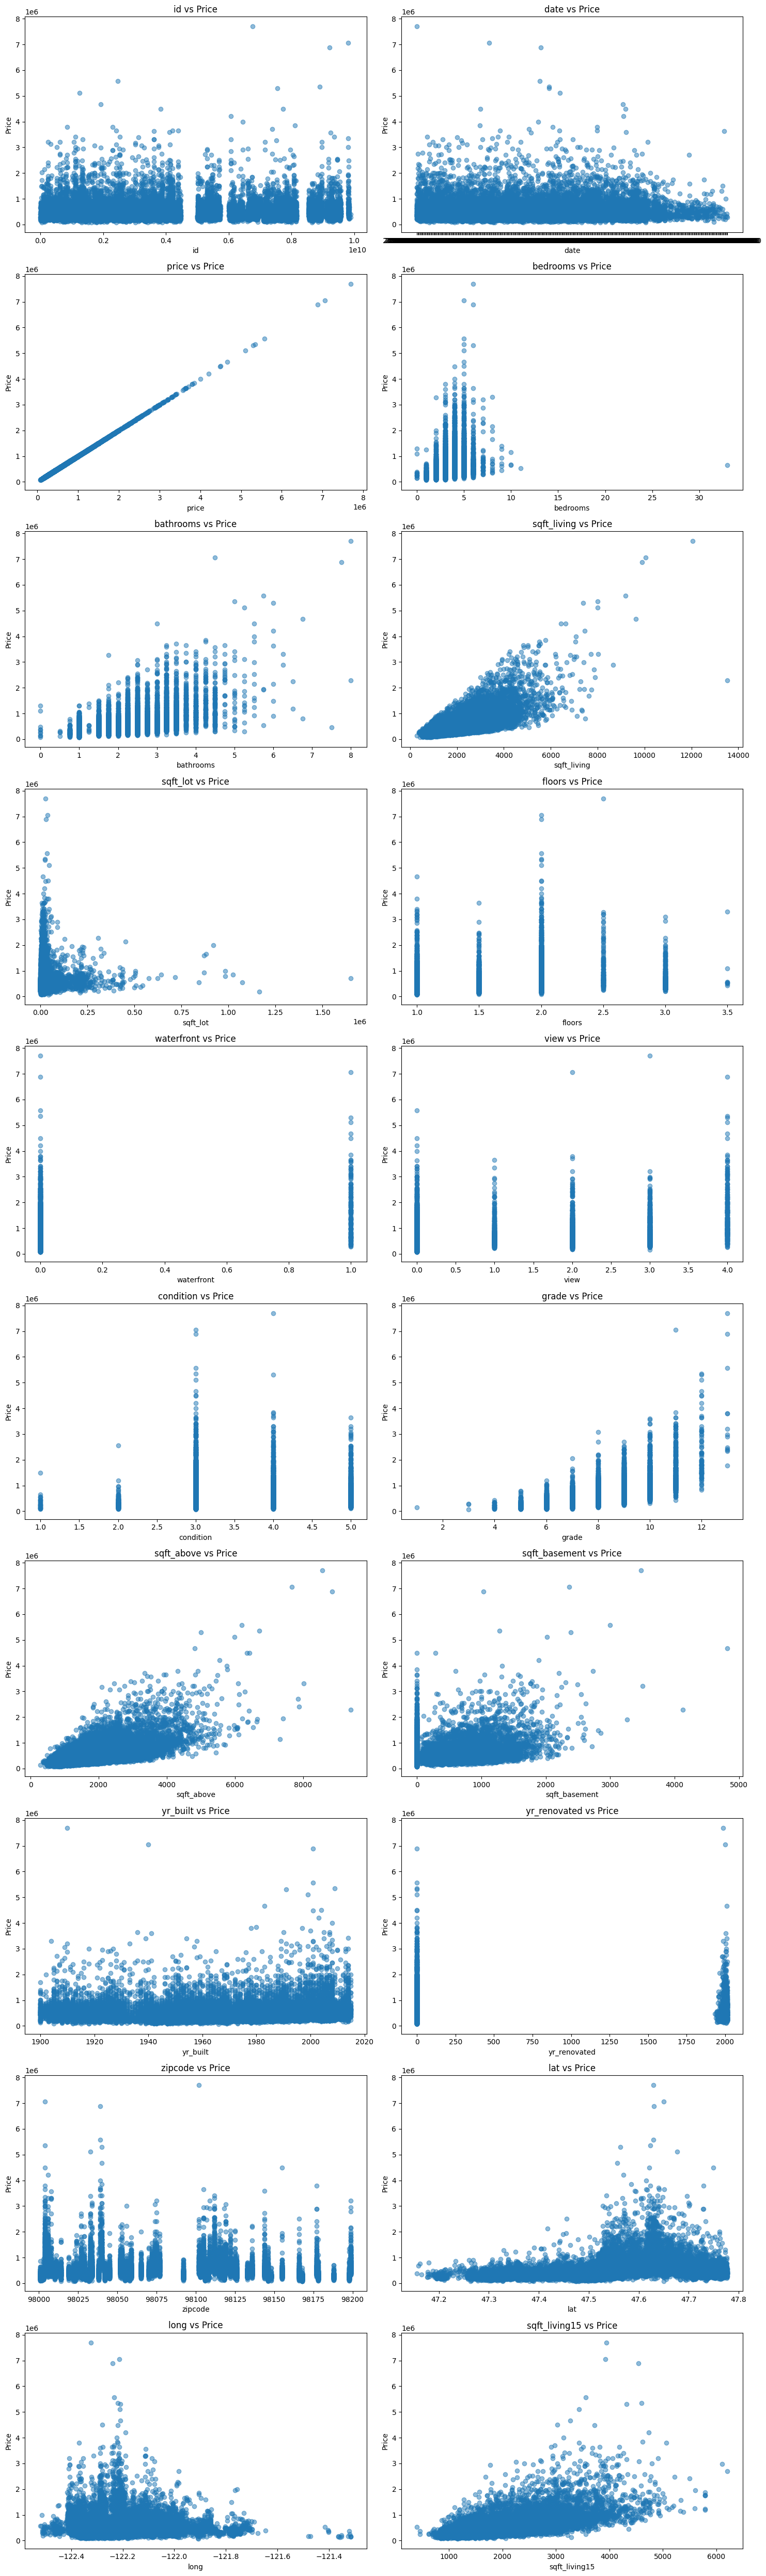

In [ ]:
# Get a list of feature names (excluding 'price')
features = df.columns[:-1]

# Calculate the number of rows and columns needed for subplots
num_features = len(features)
num_cols = 2  # Number of columns
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

# Set up the plot size and layout
plt.figure(figsize=(15, num_rows * 5))  # Adjust figure height based on rows

# Loop through each feature and create a scatter plot
for i, feature in enumerate(features, 1):
    plt.subplot(num_rows, num_cols, i)  # Use calculated rows and columns
    plt.scatter(df[feature], df['price'], alpha=0.5)
    plt.title(f"{feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Price")

# Adjust layout for better spacing
plt.tight_layout()
#plt.constrained_layout()
plt.show()

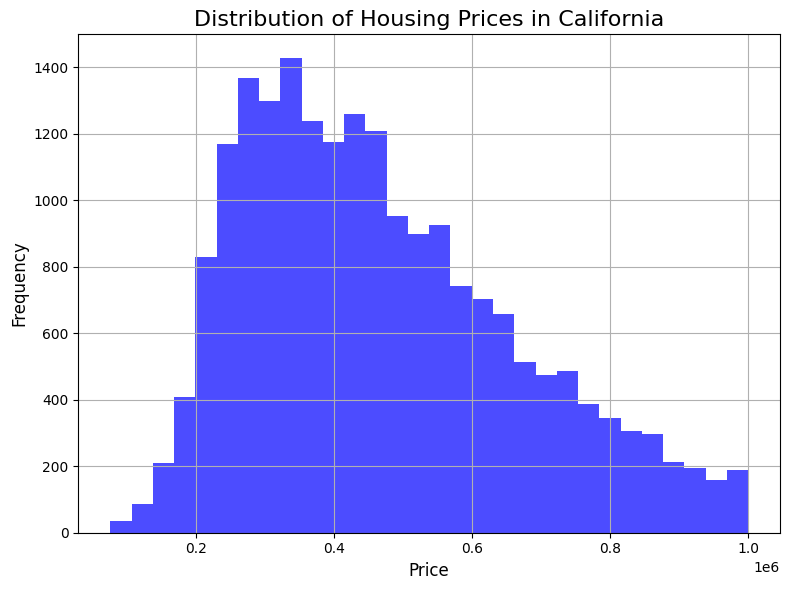

In [ ]:
# Plot a histogram of the 'Price' column

min_price = 0  # Replace with your desired minimum price
max_price = 1000000  # Replace with your desired maximum price

filtered_df = df[(df['price'] >= min_price) & (df['price'] <= max_price)]

plt.figure(figsize=(8, 6))
plt.hist(filtered_df['price'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Housing Prices in California', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Now calculate correlations on the numeric DataFrame
correlations = numeric_df.corr()['price'].sort_values(ascending=False)

# Print the correlations
print(correlations)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


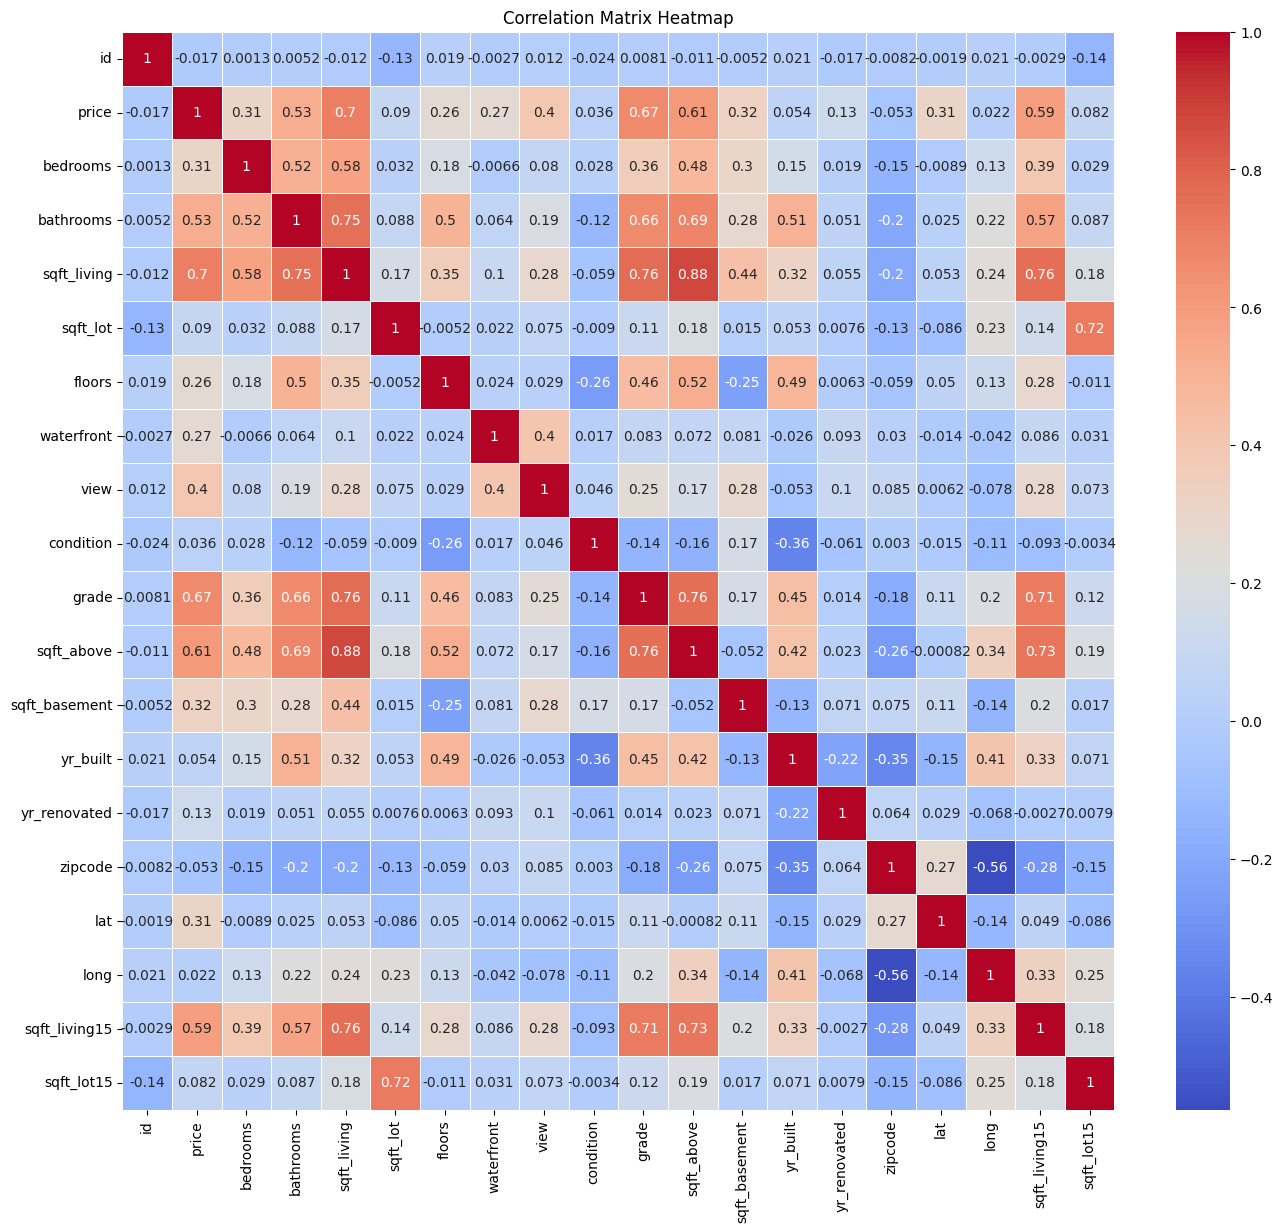

sqft_living  sqft_above     0.876597
sqft_above   sqft_living    0.876597
dtype: float64


In [ ]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Identify pairs of features with high collinearity (absolute correlation > 0.8)
high_corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Filter out self-correlations (where a feature is correlated with itself)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]

# Display the pairs with absolute correlation > 0.8
high_collinear_pairs = high_corr_pairs[high_corr_pairs > 0.8]
print(high_collinear_pairs)

In [ ]:
# Define the target (Price)
X = housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
               'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
               'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]  # Select only numeric features
y = housing['price']  # Target variable (house price)

# Split the data into training and test sets (optional for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Create a DataFrame to map the feature names to their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Print the intercept and the coefficients
print(f"Intercept: {intercept}")
print(coef_df)

# Display the final equation
equation = "Price = {:.2f}".format(intercept)
for i in range(len(coefficients)):
    equation += " + {:.2f} * {}".format(coefficients[i], X.columns[i])

print("\nFinal equation:")
print(equation)

Intercept: 6643873.527888229
          Feature    Coefficient
0        bedrooms  -34335.418739
1       bathrooms   44564.528881
2     sqft_living     109.015817
3        sqft_lot       0.088847
4          floors    7003.129520
5      waterfront  562413.070005
6            view   53641.107022
7       condition   24526.710105
8           grade   94567.891697
9      sqft_above      70.022741
10  sqft_basement      38.993076
11       yr_built   -2680.768897
12   yr_renovated      20.415633
13        zipcode    -552.253038
14            lat  595968.122144
15           long -194585.724048
16  sqft_living15      21.214331
17     sqft_lot15      -0.325832

Final equation:
Price = 6643873.53 + -34335.42 * bedrooms + 44564.53 * bathrooms + 109.02 * sqft_living + 0.09 * sqft_lot + 7003.13 * floors + 562413.07 * waterfront + 53641.11 * view + 24526.71 * condition + 94567.89 * grade + 70.02 * sqft_above + 38.99 * sqft_basement + -2680.77 * yr_built + 20.42 * yr_renovated + -552.25 * zipcode + 59596

In [ ]:
# Assuming 'date' is the column with date strings
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract numerical features from the datetime objects
# For example, you could extract year, month, day, etc.
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original 'date' column or any other non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Now, apply StandardScaler to the numerical data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA to reduce collinearity
pca = PCA(n_components=5)  # Reduce to 5 components
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame of the principal components
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5
0 -2.776387  0.157457 -0.473299  1.214804 -0.641742
1 -0.098154  1.753411 -0.863074  1.750472 -1.846440
2 -2.775414 -0.480862  0.336268 -2.069102 -0.285105
3 -0.997731  2.164861  0.432801  1.777809  1.698908
4 -0.375657 -1.113375  0.007353 -2.024486 -0.189444


In [ ]:
# Get the PCA loadings (i.e., the components that show the contribution of each feature)
pca_components = pca.components_

# Get the columns used for PCA (these should match the number of features in pca_components)
pca_columns = df_numeric.columns # Assuming df_numeric is the DataFrame used for PCA

# Create a DataFrame for the loadings for easier interpretation
pca_df = pd.DataFrame(pca_components, columns=pca_columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display the loadings (i.e., contribution of each feature to each principal component)
print(pca_df)

           id     price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
PC1 -0.004477  0.298917  0.234508   0.348614     0.387676  0.094039  0.218471   
PC2  0.002375  0.300104  0.084929   0.015993     0.123892 -0.136527 -0.159657   
PC3 -0.185402  0.013062 -0.019113  -0.111451     0.031302  0.551962 -0.319036   
PC4 -0.025102 -0.036932 -0.004807   0.000693    -0.003059  0.012602  0.014689   
PC5  0.143719 -0.093208  0.356129   0.069600     0.114912 -0.242555 -0.317590   

     waterfront      view  condition  ...  yr_built  yr_renovated   zipcode  \
PC1    0.059973  0.128003  -0.069114  ...  0.216863      0.012830 -0.136815   
PC2    0.205583  0.311585   0.208082  ... -0.363863      0.174476  0.334956   
PC3    0.102047  0.144681   0.225794  ... -0.195257      0.051012 -0.149506   
PC4   -0.026028 -0.045137   0.042420  ...  0.002127      0.009266 -0.022390   
PC5   -0.284241 -0.192393   0.388058  ... -0.045740     -0.201666 -0.322034   

          lat      long  sqft_living15

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [ ]:
nRowsRead = 10000 # specify 'None' if want to read whole file
# kc_house_data.csv has 21613 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/kc_house_data.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'kc_house_data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10000 rows and 21 columns


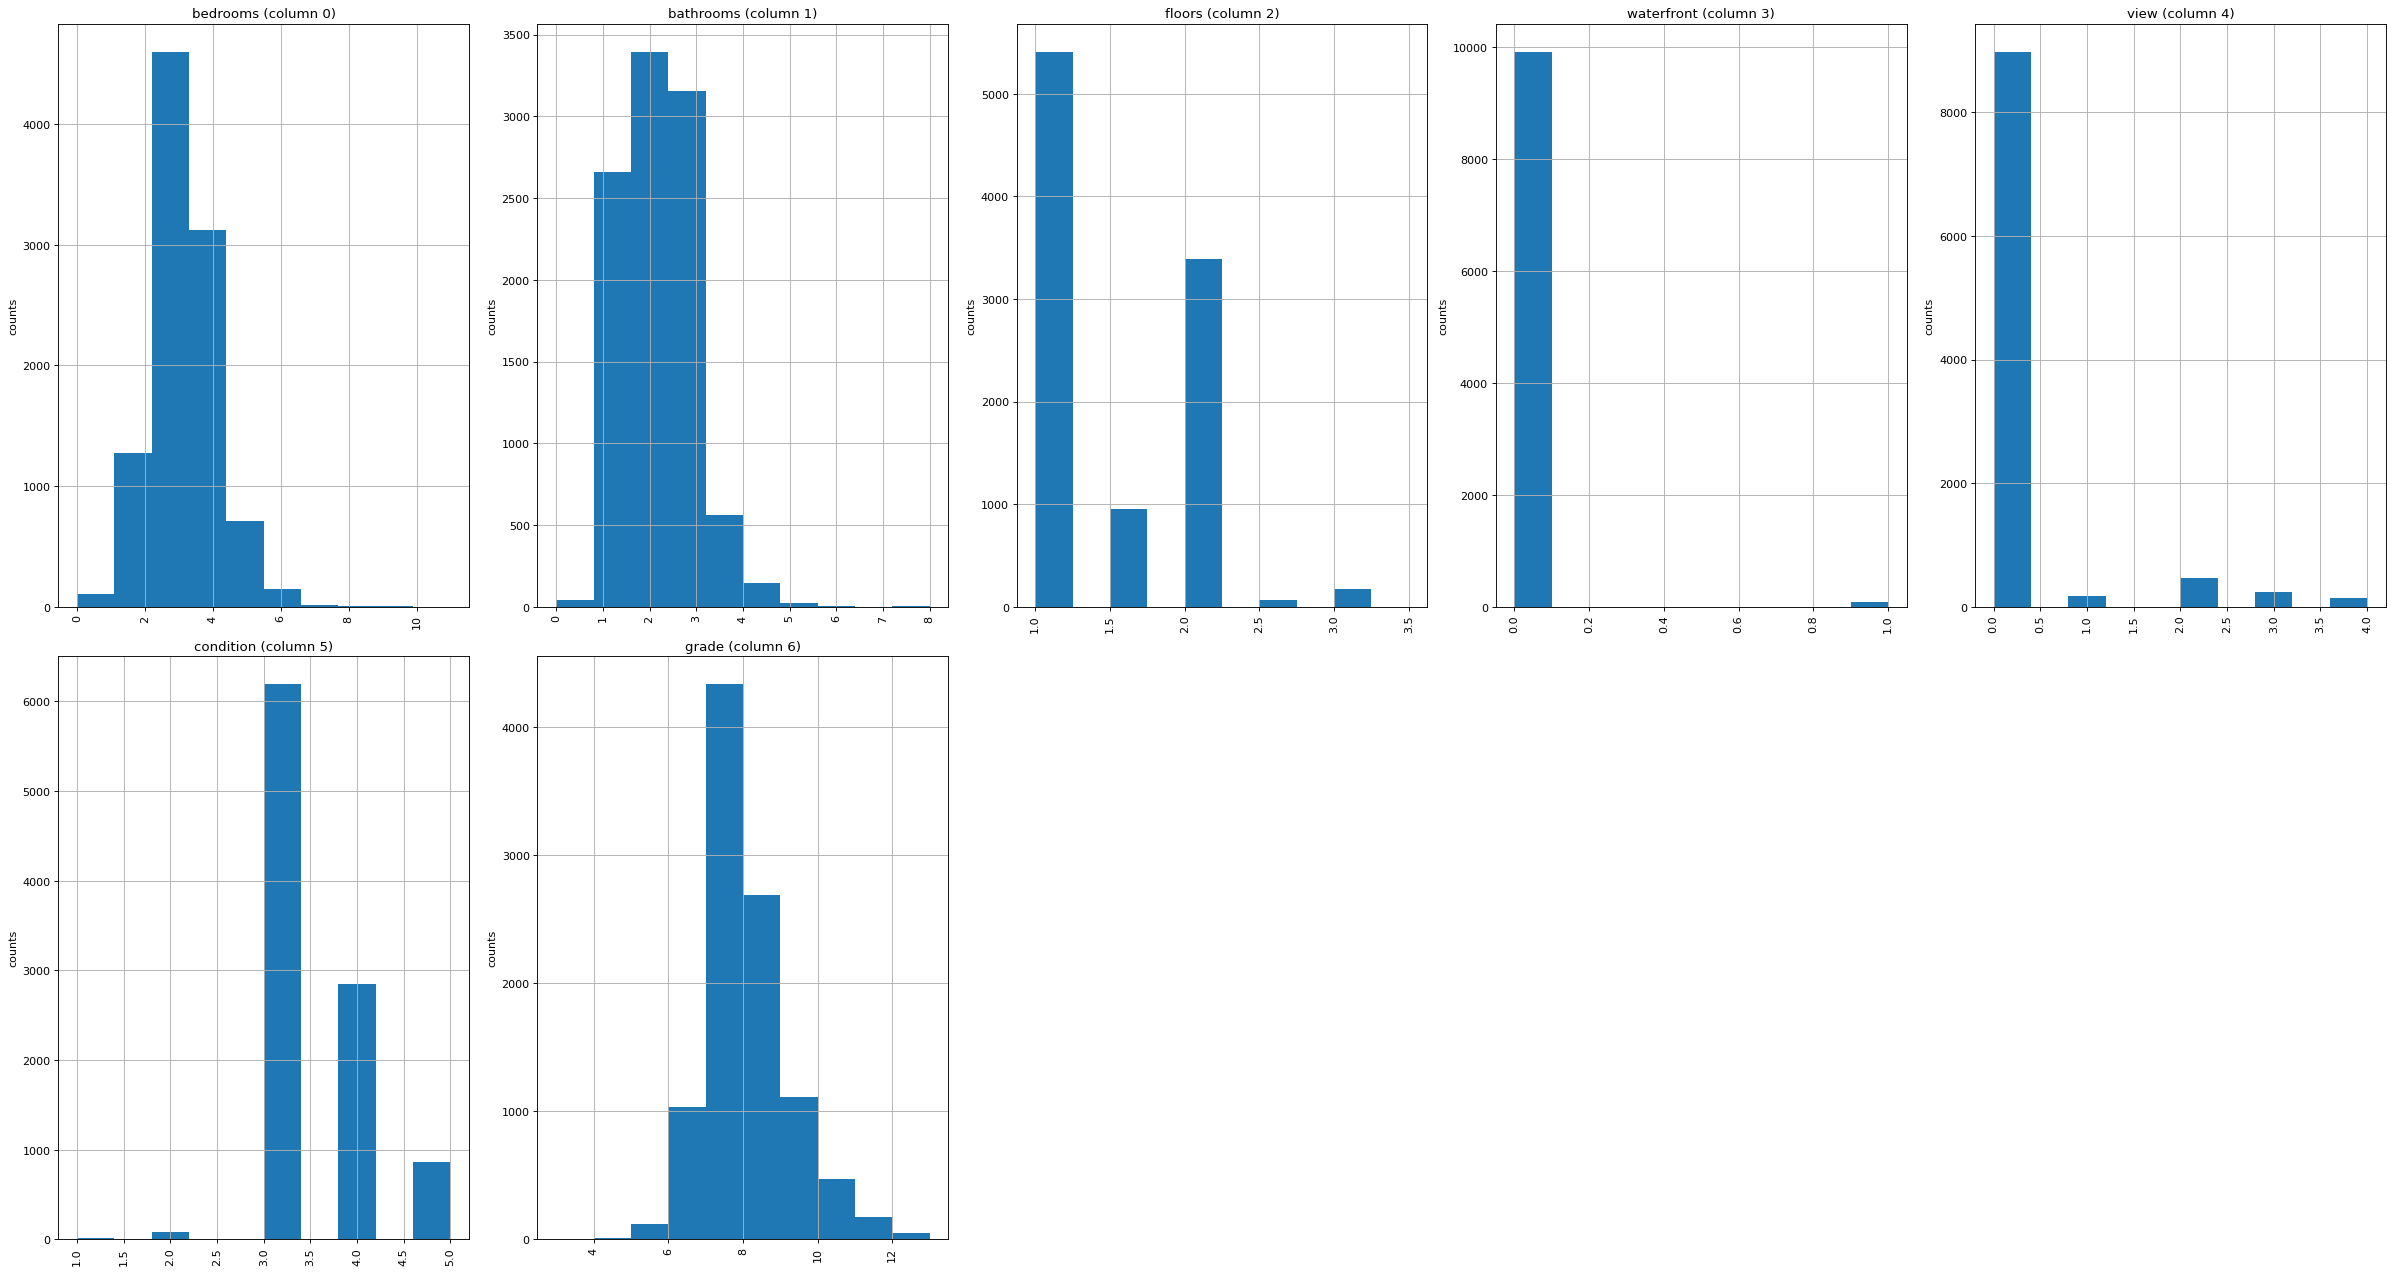

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

In [ ]:
# Independent variables (features)
X = df[['Size', 'Bedrooms', 'Age']]

# Dependent variable (target)
y = df['Price']

KeyError: "None of [Index(['Size', 'Bedrooms', 'Age'], dtype='object')] are in the [columns]"

ValueError: num must be an integer with 1 <= num <= 9, not 10

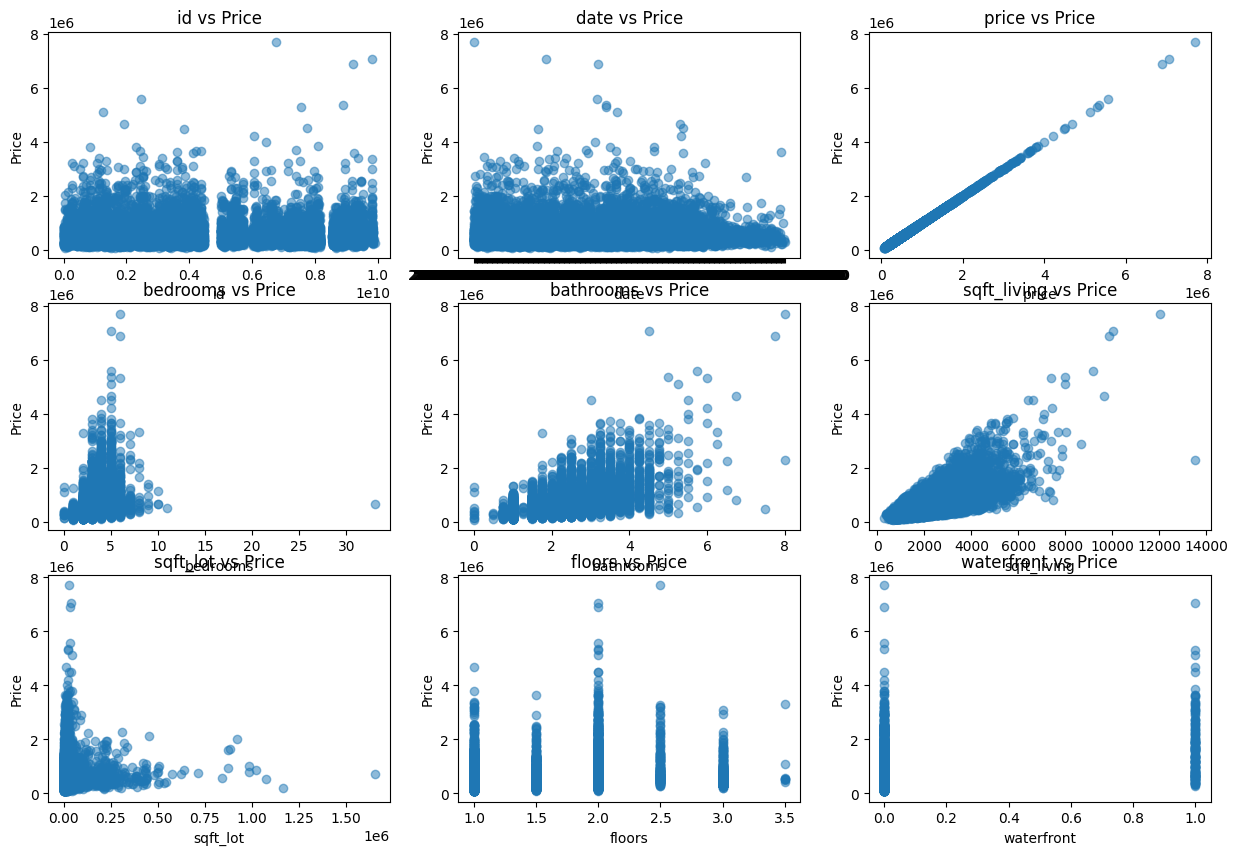

In [ ]:
# Get a list of feature names (excluding 'price')
features = df.columns[:-1]

# Set up the plot size and layout
plt.figure(figsize=(15, 10))

# Loop through each feature and create a scatter plot
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Create subplots in a 3x3 grid
    plt.scatter(df[feature], df['price'], alpha=0.5)
    plt.title(f"{feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Price")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

R-squared increases as feature count increases.  

In [ ]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

## Simple Linear Regression

In [ ]:
#%%capture
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['sqft_living']],df['price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Price for Test Data: 539744.130
Intercept: -47235.81130290113
Coefficient: [282.2468152]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,254289.149,0.492,-,0.496,-,0.491


In [ ]:
sns.set(style="white", font_scale=1)

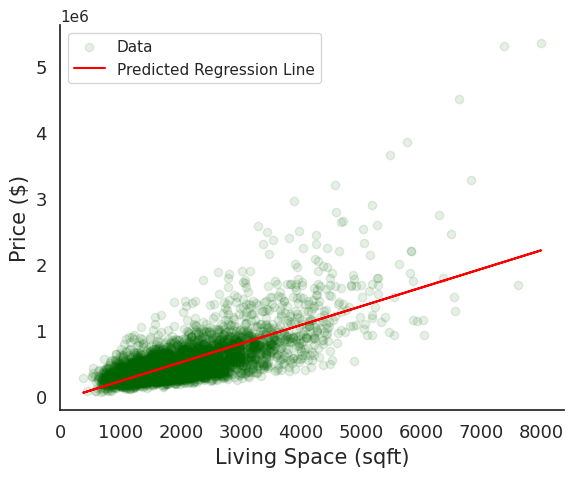

In [ ]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [ ]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

NameError: name 'plt' is not defined